In [1]:
import data_generation_functions as dgf
import learning_algorithms_functions as laf
import classical_methods_functions as cmf
import simulation_functions as sf
import visualization_functions as vf
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import pickle #it is used for importing/exporting variables
def save_obj(obj, name ):
    #Saves the existing variable in the workspace
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    #Loads a variable (already saved) from folder 'obj'
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
    
def intersect_intervals(a,b,epsilon):
    x=max(a[0],b[0])
    y=min(a[1],b[1])
    return (x-epsilon,y+epsilon)

def find_threshold_interval(D,i):
    '''
    D: Decisions
    i: relative rank
    
    Returns:
    a,b: accept if the relative rank is i and after a items observed and before b+1 items observed
    '''
    i-=1
    a=i
    if_alpha_found=False
    for d in D:
        #print(not d[i])
        if len(d)>i:
            if not if_alpha_found:
                if not d[i]:
                    a+=1
                else:
                    if_alpha_found=True
                    b=a
            else:
                if d[i]:
                    b+=1
    return a,b


#exp_utility=load_obj('exp_utility')


In [442]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


def from_D_to_dataset(D,N,k):
    X=[[s+1,(r)/N,k,0 if s+1>k else 1] for r in range(1,N) for s in range(r)]
    y=[1 if D[r-1][s] else 0 for r in range(1,N) for s in range(r)]
    return X,y

def build_D_from_y(y):
    D=[]
    i=0
    counter=0
    while counter+i<len(y):
        #print(counter,i)
        D.append(y[counter:min(counter+i+1,len(y))])
        counter+=i+1
        i+=1
    D.append([1 for j in range(i+1)])
    return D

In [443]:
Ns=[i for i in range(20,70)]
k=3
X,y=[],[]
for k in range(1):
    for N in Ns:
        U=cmf.create_payoff_array(N,3,k)
        #print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U) 
        X_0,y_0=from_D_to_dataset(D,N,k)
        X+=X_0
        y+=y_0

In [461]:
clf = RandomForestClassifier(max_depth=4, random_state=0)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 10, 10), random_state=1)


clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10, 10), random_state=1,
              solver='lbfgs')

In [462]:
Ns=[69]
k=1
X,y=[],[]
for N in Ns:
    U=cmf.create_payoff_array(N,3,k)
    #print(U)
    D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U) 
    X_0,y_0=from_D_to_dataset(D,N,k)
    X+=X_0
    y+=y_0

In [463]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [464]:
y_pred=clf.predict(X)

In [465]:
sum([np.abs(y_pred[i]-y[i]) for i in range(len(y))]),len(y),sum(y)

(0, 2346, 43)

In [466]:
D_pred=build_D_from_y(y_pred)
print(E[0][0])
D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D_pred)
print(E[0][0])
#vf.plot_decision_graph(D,if_latex=True)


0.372500040570892
0.372500040570892


0.3842088800002888


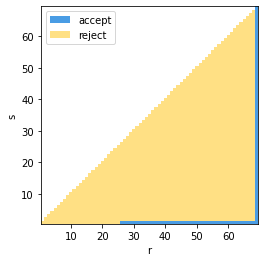

In [467]:
N=20
U=cmf.create_payoff_array(N,3,k)
#print(U)
D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
print(E[0][0])
vf.plot_decision_graph(D_pred,if_latex=True)

0.9999984947567299


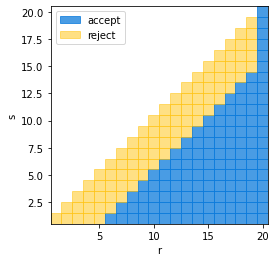

In [410]:
N=20
U=cmf.create_payoff_array(N,3,k)
#print(U)
D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
print(E[0][0])
vf.plot_decision_graph(D,if_latex=True)

In [89]:
N=5
k=1

In [102]:
Ns=[i for i in range(150,200)]
y_a,y_e,y_pol=[],[],[]
y_u,y_l=[],[]
G=[[],[],[],[]]
for N in Ns:
    Mb=[]
    U=cmf.create_payoff_array(N,3,k)
    #print(U)
    D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
    i=0
    a,b=find_threshold_interval(D,i+1)
    a
    Mb.append(E[0][0])
    G[1].append(a/N)
    G[2].append(E[0][0])

    D[a-1][i]=True
    D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
    print(a-1,E[0][0])
    Mb.append(E[0][0])
    D[a-1][i]=False
    G[1].append((a-1)/N)
    G[2].append(E[0][0])
    

    D[a][i]=False
    D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
    print(a+1,E[0][0])
    Mb.append(E[0][0])
    D[a][i]=True
    G[1].append((a+1)/N)
    G[2].append(E[0][0])
    
    G[0]+=[N,N,N]

    Ma=[[(a/N)**2,a/N,1],[((a-1)/N)**2,(a-1)/N,1],[((a+1)/N)**2,(a+1)/N,1]]
    
    qcoefs=np.linalg.solve(Ma,Mb)
    G[3].append(qcoefs)

    y_a.append(a/N)
    y_u.append((a+1)/N)
    y_l.append((a-1)/N)
    y_pol.append(-(qcoefs[1]/qcoefs[0]/2))
    y_e.append(1/np.exp(1))

54 0.36993673683052114
56 0.36993663841908203
54 0.36987093062634996
56 0.3699591330873932
55 0.3699374942768134
57 0.3698751564063602
55 0.3698845832375018
57 0.36990865211611634
55 0.36981700233455156
57 0.36992579735956893
56 0.36988877749362986
58 0.3698522642312643
56 0.36983365919290284
58 0.3698800929758513
57 0.3698842625119188
59 0.3697904978240257
57 0.3698410540456489
59 0.36982850846023213
57 0.3697839373137359
59 0.36985108212727097
58 0.36983990380892523
60 0.3697715544954984
58 0.3697943143442722
60 0.3698040293122968
58 0.36973538923848354
60 0.3698217254736687
59 0.3697963091952073
61 0.36975162410259094
59 0.3697485462744102
61 0.36977895035095726
60 0.36979055584939863
62 0.36969432119009765
60 0.369753482402329
62 0.36973084682001917
60 0.36970373570011533
62 0.36975338052710777
61 0.36975080587715153
63 0.3696778550386454
61 0.3697114238192735
63 0.36970934702066843
61 0.3696598668883517
63 0.36972741595048225
62 0.3697116341507715
64 0.36966044115845337
62 0.36967

0 0.04999999999999997
1 0.17738698285718402
2 0.2547739657143681
3 0.30716094857155224
4 0.34288126476206965
5 0.3661015809525872
6 0.37932189714310466
7 0.3842088800002888
8 0.3819530057146157
9 0.37344713142894287
10 0.35938570158771416
11 0.34032427174648566
12 0.31671738735980254
13 0.28894383630645265
14 0.25732413140694893
15 0.22213299793601662
16 0.18360853113175105
17 0.14195906432748548
18 0.09736842105263156
19 0.050000000000000024


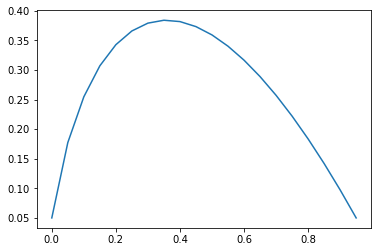

In [84]:
Ns=[20]
y_a,y_e,y_pol=[],[],[]
y_u,y_l=[],[]
G=[[],[],[],[]]


k=1
s=1
for N in Ns:
    y_a=[]
    Mb=[]
    U=cmf.create_payoff_array(N,3,k)
    #print(U)
    D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
    a_0,b_0=find_threshold_interval(D,s)
    for a in range(0,N-s+1):
        arr = [(i+1)>a for i in range(N-s+1)]
        for j in range(0,len(arr)):
            D[j+s-1][s-1]=arr[j]
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        print(a+s-1,E[0][0])
        Mb.append(E[0][0])

        G[1].append((a+s)/N)
        G[2].append(E[0][0])
    
    #Ma=[[(a/N)**2,a/N,1],[((a-1)/N)**2,(a-1)/N,1],[((a+1)/N)**2,(a+1)/N,1]]
    
    #qcoefs=np.linalg.solve(Ma,Mb)
    #G[3].append(qcoefs)

        y_a.append(a/N)
    #y_u.append((a+1)/N)
    #y_l.append((a-1)/N)
    #y_pol.append(-(qcoefs[1]/qcoefs[0]/2))
    #y_e.append(1/np.exp(1))
    
    plt.plot(y_a,Mb)

In [81]:
D

[[False],
 [False, False],
 [False, False, False],
 [False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False, False],
 [False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  Fals

0.5293052930529305 0.36787944117144233


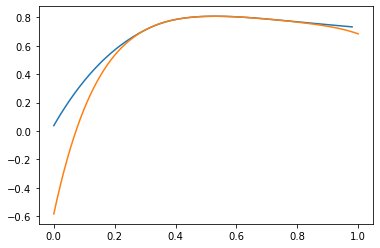

In [82]:

def polynomial_fit(x,y):
    '''finds the polynom that goes through the points (x_i,y_i)'''
    deg=len(x)-1
    Ma=[[xi**j for j in range(deg,-1,-1)] for xi in x]
    Mb=y
    return np.linalg.solve(Ma,Mb)

def evaluate_polynom(x,q):
    deg=len(q)-1
    return [sum([xi**j*q[deg-j] for j in range(deg,-1,-1)]) for xi in x]
    
deg=3
qcoefs=polynomial_fit(y_a[a_0-deg:a_0+deg+1],Mb[a_0-deg:a_0+deg+1])
x_poly=np.linspace(0,1,100000)
y_poly=evaluate_polynom(x_poly,qcoefs)
plt.plot(y_a,Mb)
plt.plot(x_poly,y_poly)


#find the maximizer of the polynom
max_prob=0
argmax_prob=0
for j in range(len(x_poly)):
    if y_poly[j]>max_prob:
        max_prob=y_poly[j]
        argmax_prob=x_poly[j]
print(argmax_prob,1/np.exp(1))

In [62]:
for a in range(0,N-s+1):
    print([(i+1)>a for i in range(N-s+1)])

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, F

In [63]:
a_0,y_a[a_0-deg:a_0+deg+1],Mb[a_0-deg:a_0+deg+1]

(16, [0.75, 0.8], [0.8395596457206368, 0.8426941788861294])

In [51]:
Mb

[0.2585090992598734,
 0.2585090992598734,
 0.2585090992598734,
 0.2585090992598734,
 0.2585090992598734,
 0.2585090992598734,
 0.2585090992598734,
 0.34460999956356014,
 0.4305045015184337,
 0.5159862067756807,
 0.5935900528779788,
 0.6543871762912014,
 0.7031615958860548,
 0.7428802879267277,
 0.7754575970984642,
 0.801368047157521,
 0.8196323765673613,
 0.8320295081595394,
 0.8395596457206368,
 0.8426941788861294]

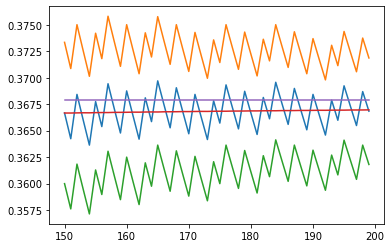

In [103]:
plt.plot(Ns,y_a)
plt.plot(Ns,y_u)
plt.plot(Ns,y_l)
plt.plot(Ns,y_pol)
plt.plot(Ns,y_e)

In [104]:
y_pol[-1]-y_e[-1],min(y_u)-max(y_l)

(-0.0009182158876666624, 0.005661231884057982)

In [106]:
sum(y_a)/len(y_a)-y_e[-1]

-0.0010207052139456496

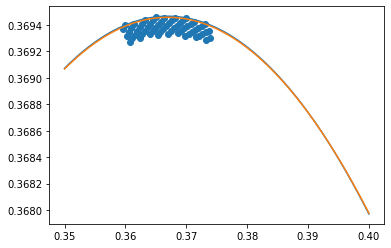

In [96]:
plt.scatter(G[1],G[2])

for qcoefs in G[3][:2]:
    x_=np.linspace(0.35,0.4,200)
    y_=[sum([x**i*qcoefs[-i-1] for i in range(len(qcoefs))]) for x in x_]

    plt.plot(x_,y_)


In [47]:
x=1
[x**i*qcoefs[-i]for i in range(len(qcoefs)-1,-1,-1)]

[1.054079254056303, 0.2290993846610197, -0.7925407925235357]

In [45]:
qcoefs

array([-0.79254079,  1.05407925,  0.22909938])

In [174]:


cmf.find_expected_nr_of_observed_candidates(N,D)/N

0.679961266803372

In [92]:
y_u[-1]/2+y_l[-1]/2,min(y_u)-max(y_l),y_u[-1]-y_l[-1]



(0.365296803652968, 0.004972146770406527, 0.0091324200913242)

In [94]:
sum(y_pol)/len(y_pol),1/np.exp(1)

(0.3670036060131355, 0.36787944117144233)

rou=4
Ns=[10,20,50,100,1000,10000]
#Ns=[10,11,12,13]
#print tables
if False:
    #Classic
    for N in Ns:
        U=cmf.create_payoff_array(N,0,0)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        pr=np.round(E[0][0],rou)
        ex=np.round(cmf.find_expected_nr_of_observed_candidates(N,D)/N,rou)
        a,b=find_threshold_interval(D,1)
        a_1='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        print('{} & {} & {} & {}'.format(N,pr,ex,a_1))
else:
    #3rd Best
    for N in Ns:
        U=cmf.create_payoff_array(N,2,3)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        pr=np.round(E[0][0],rou)
        ex=np.round(cmf.find_expected_nr_of_observed_candidates(N,D)/N,rou)
        a,b=find_threshold_interval(D,1)
        a_1='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        a,b=find_threshold_interval(D,2)
        a_2='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        a,b=find_threshold_interval(D,3)
        a_3='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        print('{} & {} & {} & {} & {}'.format(N,pr,ex,a_2,a_3))
    

In [ ]:
rou=4
Ns=[10,20,50,100,1000,10000]
#Ns=[10,11,12,13]
#print tables
if True:
    #Classic
    for N in Ns:
        U=cmf.create_payoff_array(N,0,0)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        pr=np.round(E[0][0],rou)
        ex=np.round(cmf.find_expected_nr_of_observed_candidates(N,D)/N,rou)
        a,b=find_threshold_interval(D,1)
        a_1='{}'.format(np.round((a)/N,rou))
        print('{} & {} & {} & {}'.format(N,pr,ex,a_1))
else:
    #3rd Best
    for N in Ns:
        U=cmf.create_payoff_array(N,2,3)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        pr=np.round(E[0][0],rou)
        ex=np.round(cmf.find_expected_nr_of_observed_candidates(N,D)/N,rou)
        a,b=find_threshold_interval(D,1)
        a_1='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        a,b=find_threshold_interval(D,2)
        a_2='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        a,b=find_threshold_interval(D,3)
        a_3='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        print('{} & {} & {} & {} & {}'.format(N,pr,ex,a_2,a_3))
    

In [ ]:
alphas,betas

In [ ]:
alphas,betas

In [ ]:
#vanderbei test
for N in [2,3,4,5,6,7,8,9,10,19,20]:
    k_0=np.floor(N/2)
    print(N,k_0,k_0*(N-k_0)/N/(N-1),(N/2/(4*N/2-2)))

In [ ]:
def plot_figures(figure_id=1,N=10):
    if figure_id==1:
        #standarad problem solution
        U=cmf.create_payoff_array(N,0,7)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        print(E[0])
        vf.plot_decision_graph(D,if_latex=True)
    if figure_id==2:
        #2nd best solution
        U=cmf.create_payoff_array(N,2,2)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        print(E[0])
        vf.plot_decision_graph(D,if_latex=True)
    if figure_id==3:
        #Vanderbei's 2nd best solution
        U=cmf.create_payoff_array(N,2,2)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        D[-2][0]=False
        print(E[0])
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        vf.plot_decision_graph(D,if_latex=True)
    if figure_id==4:
        #3rd best
        U=cmf.create_payoff_array(N,2,3)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        vf.plot_decision_graph(D,if_latex=True)    
    if figure_id==5:
        #4th best
        U=cmf.create_payoff_array(N,2,4)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        print(E[0])
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        vf.plot_decision_graph(D,if_latex=True)    
    if figure_id==6:
        #Median Item
        U=cmf.create_payoff_array(N,1.6,0)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        print(E[0])
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        vf.plot_decision_graph(D,if_latex=True)    
    
    
plot_figures(6,11)

In [ ]:
for j in range(8):
    x=False
    for i in range(len(D)-1):
        if i>=j:
            #print(i,j,D[i][j])
            if x!=D[i][j]:
                x=D[i][j]
                print(i+1,i/N,(i+1)/N,j+1)

In [ ]:
D

###### rel_ranks,ranks=dgf.generate_candidates_v2(N)

In [ ]:
pay_offs=[U[r-1] for r in ranks]
pay_offs

In [ ]:
CD=[dgf.generate_candidates_v2(N) for i in range(100000)]
sf.evaluate_the_hiring_strategy(N,U,D,CD)

In [ ]:
D[-4]

In [ ]:
E[-4]

In [ ]:
N=10
cmf.create_payoff_array(5,5.2,2)

In [ ]:
problem=1.6
k=0.37

Ns=[N for N in range(max(5,k),3010,75)]#+[N for N in range(20,50,5)]
xs,ys=[],[]

for N in Ns:
    if not (problem,k,N) in exp_utility:
        print(N,'started')
        U=cmf.create_payoff_array(N,problem,k)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        exp_utility[(problem,k,N)]=E[0][0]

    save_obj(exp_utility,'exp_utility')
    
    
    
if False:
    xs.append(N)
    ys.append(E[0][0])
    plt.plot(xs,ys)
    plt.scatter(xs,ys)

    
    xs,ys=[],[]
    for N in Ns:
        U=cmf.create_payoff_array(N,5.1,1)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        xs.append(N)
        ys.append(E[0][0])
    plt.plot(xs,ys)
    plt.scatter(xs,ys)


    xs,ys=[],[]
    for N in Ns:
        U=cmf.create_payoff_array(N,5.2,1)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        xs.append(N)
        ys.append(E[0][0])
    plt.plot(xs,ys)
    plt.scatter(xs,ys)

In [ ]:
xs,ys=[],[]
for i in exp_utility:
    p,k_0,x=i
    if p==problem and k_0==k and x<20:
        xs.append(x)
        ys.append(exp_utility[i])

In [ ]:
ys

In [ ]:
#k=0.4
asy=0.25
for problem in [1.6]:
    xs,ys=[],[]
    for i in exp_utility:
        p,k_0,x=i
        if p==problem and k_0==k and x<10000:
            xs.append(x)
            ys.append(exp_utility[i])
    plt.scatter(xs,ys)
    #plt.plot(xs,[asy for x in xs])
plt.xlabel('Number of Candidates (N)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility vs Number of Candidates')
#plt.legend(['Optimal Exp. Utility for N','Asympt. Optimal Exp. Utility (N -> Inf)'])

In [ ]:
cmf.create_payoff_array(8,1.6,k)

In [ ]:
exp_utility[(1.6,0.2,20)]

In [ ]:
from scipy.optimize import curve_fit
def func(x, a, b, c, e):
    return a * np.exp(-b * np.asarray(x)) + c+e/x

def func2(x, a,b,c, e):
    return c+e/x+a/x/x+b/x/x/x

popt, pcov = curve_fit(func, xs, ys, bounds=(0, [5., 5., 0.5,5]))
popt

In [ ]:
def dynamic_solution_general_form(n,U):
    '''n: the number of candidates
       U: payoffs for each candidate, U[x-1] is the payoff of best xth candidate. 
       
       returns the strategy which maximizes the expected payoff
       
       For example: U=[1,0,0,.....] gives the classical problem. U=[-1,-2,..,-n] gives the expected rank minimization
    '''
    Decisions_Accept=[[True for i in range(j)] for j in range(1,n+1)]
    I=np.zeros((n,n))
    I[-1]=U.copy()
    for r in range(-2,-n-1,-1):
        for s in range(0,n+r+1):
            I[r][s]=I[r+1][s]*(1-(s+1)/(n+r+2))+I[r+1][s+1]*((s+1)/(n+r+2))

    E=np.zeros((n,n))
    E[-1]=U.copy()
    for r in range(-2,-n-1,-1):
        expected_r=sum(E[r+1])/(n+r+2)
        for s in range(0,n+r+1):
            if I[r][s]<expected_r:
                Decisions_Accept[r][s]=False
                E[r][s]=expected_r
            else:
                E[r][s]=I[r][s]

    return Decisions_Accept,E,I
N=100

import time
start_time = time.time()
U=cmf.create_payoff_array(N,1.1,1)
#print(U)
D,E,I=cmf.dynamic_solution_general_form_archived(N,U)

print(N,"Before:  --- %s seconds ---" % (time.time() - start_time))


start_time = time.time()
U=cmf.create_payoff_array(N,1.1,1)
#print(U)
D,E,I=dynamic_solution_general_form(N,U)

print(N,"After:  --- %s seconds ---" % (time.time() - start_time))

print(E[0][0])
#vf.plot_decision_graph(D,if_latex=True)

In [ ]:
I

In [ ]:
N=10
Decisions_Accept=[[True for i in range(j)] for j in range(n)]
I=np.zeros((n,n))
I[-1]=U.copy()
for r in range(-2,-n,-1):
    for s in range(0,n+r+1):
        I[r][s]=I[r+1][s]*(s+1)/(n+r+2)+I[r+1][s+1]*(1-(s+1)/(n+r+2))
        
E=np.zeros((n,n))
E[-1]=U.copy()

for r in range(-2,-n,-1):
    expected_r=sum(E[r])/(n+r+2)
    for s in range(0,n+r+1):
        if I[r][s]<expected_r:
            Decisions_accept[r][s]=False
            E[r][s]=expected_r
        else:
            E[r][s]=I[r][s]
        




In [ ]:
xs[100-xs[0]]

In [ ]:
min_ind=20
max_ind=101-xs[0]
#popt, pcov = curve_fit(func, xs[min_ind:max_ind], ys[min_ind:max_ind], bounds=(0, [1, 1, 2,2]))
popt, pcov = curve_fit(func2, xs[min_ind:max_ind], ys[min_ind:max_ind], bounds=(0, [2,2,2,2]))
plt.plot(xs,ys)
#plt.scatter(xs,ys)
print(popt)
plt.plot(xs, func2(xs, *popt))
#plt.plot(xs, func(xs, *np.asarray([0,0,0.1919,0.1919])))

plt.xlabel('Number of Candidates (N)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility vs Number of Candidates')
#plt.legend(['Optimal Exp. Utility for N','Asympt. Optimal Exp. Utility (N -> Inf)'])
#plt.legend(['Optimal Exp. Utility for N'])

In [ ]:
ys-func2(xs, *popt)

In [ ]:
min_ind=81-xs[0]
max_ind=101-xs[0]
popt, pcov = curve_fit(func, xs[min_ind:max_ind], ys[min_ind:max_ind], bounds=(0, [1, 1, 2,2]))
plt.plot(xs[0:],ys[0:])
#plt.scatter(xs,ys)
print(popt)
plt.plot(xs[0:], func(xs[0:], *popt))
#plt.plot(xs, func(xs, *np.asarray([0,0,0.1919,0.1919])))

plt.xlabel('Number of Candidates (N)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility vs Number of Candidates')
plt.legend(['Optimal Exp. Utility for N','Approximated Exp. Utility'])
#plt.legend(['Optimal Exp. Utility for N'])

In [ ]:
xs[min_ind:max_ind]

In [ ]:
def take_derivative(x,y):
    return x[0:-1],[(y[i+1]-y[i])/(x[i+1]-x[i]) for i in range(len(y)-1)]

In [ ]:
dx,dy=take_derivative(xs,ys)
d2x,d2y=take_derivative(dx,dy)
logy=[np.log(i) for i in ys]
plt.plot(dx,dy)

In [ ]:
d2y

In [ ]:
dy[-1]/0.2+ys[-1]

In [ ]:
[ys[i+1]-ys[i] for i in range(len(ys)-1)]

In [ ]:
local_mins=[[],[]]
local_maxs=[[],[]]

for i in range(1,len(xs)-1):
    if ys[i]<ys[i+1] and ys[i]<ys[i-1]:
        local_mins[0].append(xs[i])
        local_mins[1].append(ys[i])
    if ys[i]>ys[i+1] and ys[i]>ys[i-1]:
        local_maxs[0].append(xs[i])
        local_maxs[1].append(ys[i])
        
plt.plot(xs,ys)
plt.scatter(xs,ys)
        
plt.plot(local_mins[0],local_mins[1])
plt.scatter(local_mins[0],local_mins[1])
plt.plot(local_maxs[0],local_maxs[1])
plt.scatter(local_maxs[0],local_maxs[1])

In [ ]:
n=50
N=n
list_of_Ds=[[[False if np.random.uniform()<1 else True for i in range(j)] for j in range(1,n)]+[[True for i in range(n)]] for d in range(10)]
U=cmf.create_payoff_array(N,1,3)
print(U)

In [ ]:
vf.plot_decision_graph(list_of_Ds[0])

In [ ]:
D=list_of_Ds[0]
CD=[generate_candidates_with_fixed_point(N,i+1,j+1) for i in range(n-2,-1,-1) for j in range(i+1) for k in range(10)]
for b in range(10):
    for i in range(n-1,-1,-1):
        for j in range(i):
            p_0=sf.evaluate_the_hiring_strategy(n,U,D,CD)

            #try to negate one D[i][rel_ranks[i]-1]
            D[i][j]=not D[i][j]

            p_1=sf.evaluate_the_hiring_strategy(n,U,D,CD)
            print(p_0,p_1)
            if p_0>p_1:
                D[i][j]=not D[i][j] 

In [ ]:
CD

In [ ]:
[(i,j,k)  for i in range(n-2,-1,-1) for j in range(i) for k in range(2)]

In [ ]:
CD=[dgf.generate_candidates_v2(N) for i in range(1000)]
sf.evaluate_the_hiring_strategy(n,U,D,CD)

In [ ]:
CD

In [ ]:
ranks

In [ ]:
D

In [ ]:
def generate_candidates_with_fixed_point(n,r,s):
    '''
    Creates a list of candidates with their rank, and also outputs the relative ranks
    
    Unlike the first version it randomly generates the relative ranks, then calculate the actual ranks. 
    That's why it is much faster for n>100
    
    Parameters:
    n: number of candidates
    r: rth candidate
    s: relative rank of rth candidate
    
    Returns:
    rel_ranks: relative ranks of the candidates
    b: ranks of the candidates
    '''
    a=[i for i in range(n)]
    rel_ranks=[np.random.randint(0,j+1) for j in range(n)]
    rel_ranks[r-1]=s-1
    b=[0 for i in range(n)]
    for i in range(n-1,-1,-1):
        b[i]=a[rel_ranks[i]]+1
        del a[rel_ranks[i]]
    return [r+1 for r in rel_ranks],b

In [ ]:
generate_candidates_with_fixed_point(10,9,1)

In [ ]:
df=pd.read_csv('data/apple_stock_data.csv',parse_dates=[0,1])
df

In [ ]:
df['val']=df.iloc[:,1].apply(lambda x:float(x.split('$')[1]))
df

In [ ]:
file_name='TEAM'
n,m,interv=7,600,1
last_data_date='2019-01-01'
CDs=dgf.generate_multi_data_from_the_stock_data(n,m,interv,last_data_date,file_name)

file_name='TEAM'
n,m,interv=7,300,1
last_data_date='2020-09-15'
CDs_Test=dgf.generate_multi_data_from_the_stock_data(n,m,interv,last_data_date,file_name)


In [ ]:
N=n
U=cmf.create_payoff_array(N,0,1)
#U=[1-u for u in U]
D_r,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)

In [ ]:
vf.plot_decision_graph(D_r)

In [ ]:
#conver CDs:
CD=[(cd[0],cd[1]) for cd in CDs]



D=[[False if np.random.uniform()<1 else True for i in range(j)] for j in range(1,n)]+[[True for i in range(n)]]
for b in range(10):
    for i in range(n-1,-1,-1):
        for j in range(i):
            p_0=sf.evaluate_the_hiring_strategy(n,U,D,CD)

            #try to negate one D[i][rel_ranks[i]-1]
            D[i][j]=not D[i][j]

            p_1=sf.evaluate_the_hiring_strategy(n,U,D,CD)
            print(p_0,p_1)
            if p_0>=p_1:
                D[i][j]=not D[i][j] 

In [ ]:
vf.plot_decision_graph(D)

In [ ]:
[sf.evaluate_the_hiring_strategy_on_stocks(n,U,Dx,CDs_Test) for Dx in [[[True]],D_r,D]]

In [ ]:
file_name='apple_stock_data'
df=pd.read_csv('data/'+file_name+'.csv',parse_dates=[0,1])
generate_data_from_the_stock_data(10,'2020-02-17',df)

In [ ]:
last_data_date='2020-02-17'
interv=10
dt.strftime(dt.strptime(last_data_date,'%Y-%m-%d')-timedelta(days=interv),'%Y-%m-%d')

In [ ]:
file_name='apple_stock_data'
n,m,interv=10,12,10
last_data_date='2020-05-01'
CDs=dgf.generate_multi_data_from_the_stock_data(n,m,interv,last_data_date,file_name)

In [ ]:
U

In [ ]:

req = requests.get(src_link)
url_content = req.content
csv_file = open('data\\'+company_code+'.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [ ]:
import datetime;
ts = datetime.datetime.now().timestamp()
p2,p1=int(ts),int(ts-2*365*24*60*60)
print(p1,p2)

In [ ]:
src_link='https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history'.format(company_code,p1,p2)
src_link

In [ ]:
import datetime
import requests
def create_the_source_link(company_code,years):
    ts = datetime.datetime.now().timestamp()
    p2,p1=int(ts),int(ts-years*365*24*60*60)
    return 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history'.format(company_code,p1,p2)

def download_data(company_code,years=3):
    src_link=create_the_source_link(company_code,years)
    req = requests.get(src_link)
    url_content = req.content
    csv_file = open('data\\'+company_code+'.csv', 'wb')

    csv_file.write(url_content)
    csv_file.close()

In [ ]:
download_data('AB')

In [ ]:
#for company_code in ['TGODF','TSLA','BA','FSLY','MAIN','TEAM','WMT','NOW','OKTA','ORCL','RLFTF','SRNE']:
for company_code in ['TWLO','TEAM','MN','MNKD']:
    download_data(company_code)
    for k in [10,20,40,80,160]: 
        try:
            df=pd.read_csv('data\\'+company_code+'.csv')
            L=df.shape[0]
            for i in range(L):
                df.loc[i,'mean']=df.iloc[max(0,i-k):i,1].mean()
                try:
                    df.loc[i,'in_k_days']=df.loc[k+i,'Open']/df.loc[i,'Open']-1
                except:
                    pass
            df['perc2mean']=df['Open']/df['mean']-1
            df_x=df[df.in_k_days.notnull()&df.perc2mean.notnull()]
            X,y=[[x] for x in df_x.perc2mean],[y for y in df_x.in_k_days]
            from sklearn.neighbors import KNeighborsRegressor
            neigh = KNeighborsRegressor(n_neighbors=15)
            neigh.fit(X, y)

            print(company_code,k,neigh.predict([[df.loc[L-1,'perc2mean']]]))
        except:
            pass

In [ ]:
df.loc[L-1,'perc2mean']

In [ ]:
X

In [ ]:
plt.scatter(df.perc2mean,df.in_k_days)

In [ ]:
file_name='apple_stock_data'
n,m,interv=10,12,10
last_data_date='2020-03-05'
CDs=dgf.generate_multi_data_from_the_stock_data(n,m,interv,last_data_date,file_name)

In [ ]:
CDs[0]

In [ ]:
## Learning Part

N=10
k=5
U=cmf.create_payoff_array(N,2,k)
#print(U)
D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)

print(E[0][0])

In [ ]:
## Create Datasets
def create_a_dataset(Ns):
    X,y=[],[]
    k=3
    for N in Ns:
        U=cmf.create_payoff_array(N,2,k)
        #print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        for i in range(N-1):
            for j in range(i+1):
                #X.append([(i+1)/N,(j+1)/(i+1),j+1,1/N,N-i])
                X.append([(i+1)/N,(j+1)/(i+1),j+1,N-i,1/N])
                y.append(int(D[i][j]))
                #print(i+1,j+1,1/N,int(D[i][j]))
    return X,y

def build_D_from_y(y):
    D=[]
    i=0
    counter=0
    while counter+i<len(y):
        print(counter,i)
        D.append(y[counter:min(counter+i+1,len(y))])
        counter+=i+1
        i+=1
    D.append([1 for j in range(i+1)])
    return D

In [ ]:
X_train, y_train = create_a_dataset(range(5,351,7))
X_test, y_test = create_a_dataset([1000])

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(50, 50, 2), random_state=1)
    
clf= RandomForestClassifier(max_depth=20, random_state=0)

clf.fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
sum(y_pred),sum(y_test),len(y_test),sum([np.abs(y_pred[i]-y_test[i]) for i in range(len(y_pred))])

In [ ]:
sum([np.abs(y_pred[i]-y_test[i]) for i in range(len(y_pred))])

In [ ]:
vf.plot_decision_graph(build_D_from_y(y_pred))

In [ ]:
vf.plot_decision_graph(build_D_from_y(y_test))

In [ ]:
from scipy.optimize import curve_fit
def func(x, a, b, c, e):
    return a * np.exp(-b * np.asarray(x)) + c+e/x

def func2(x, a,b,c, e):
    return c+e/x+a/x/x+b/x/x/x

popt, pcov = curve_fit(func, xs, ys, bounds=(0, [5., 5., 0.5,5]))
popt

In [ ]:
##Try to extend solution to larger Ns for kth best
def intersect_intervals(a,b,epsilon):
    x=max(a[0],b[0])
    y=min(a[1],b[1])
    return (x-epsilon,y+epsilon)

def find_threshold_interval(D,i):
    '''
    D: Decisions
    i: relative rank
    
    Returns:
    a,b: accept if the relative rank is i and after a items observed and before b+1 items observed
    '''
    i-=1
    a=i
    if_alpha_found=False
    for d in D:
        #print(not d[i])
        if len(d)>i:
            if not if_alpha_found:
                if not d[i]:
                    a+=1
                else:
                    if_alpha_found=True
                    b=a
            else:
                if d[i]:
                    b+=1
    return a,b

k=10
alphas=[(0,1) for i in range(k)]
betas=[(0,1) for i in range(k)]
list_a,list_b=[[] for i in range(k)],[[] for i in range(k)]
x=[]
Nx=100
for N in range(4*k,101):
#for N in [10,11,20,21,30,40,50]:
    U=cmf.create_payoff_array(N,3,k)
    #print(U)
    D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
    x.append([1/N])
    x.append([1/N])
    for i in range(k):
        a,b=find_threshold_interval(D,i+1)
        #print((a/N,(a+1)/N),(b/N,(b+1)/N))
        list_a[i].append((a-1)/N)
        list_a[i].append((a+1)/N)
        list_b[i].append((b-1)/N)
        list_b[i].append((b+1)/N)


        alphas[i] = intersect_intervals(alphas[i],((a-1)/N,(a+1)/N),0) 
        betas[i] =  intersect_intervals(betas[i],((b-1)/N,(b+1)/N),0) 


In [ ]:
1/np.exp(1)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(loss="ls")

from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=True)
y=list_a[0]

clf.fit(x,y)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(loss="ls")

from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=True)
y=list_a[6]

from sklearn.svm import SVC
clf = SVC(kernel='linear')

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

clf.fit([[x[i][0],y[i]] for i in range(len(x))],[i%2 for i in range(len(x))])

In [ ]:
x

In [ ]:
[[x[i][0],y[i]] for i in range(len(x))],[i%2 for i in range(len(x))]

In [ ]:
y_pred=clf.predict([[x[i][0],y[i]] for i in range(len(x))])
y_act=[i%2 for i in range(len(x))]
sum([np.abs(y_pred[i]-y_act[i]) for i in range(len(x))])

In [ ]:
w = clf.coef_[0]
a = -w[0] / w[1]
a,(clf.intercept_[0]) / w[1]

In [ ]:
clf.coef_

In [ ]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0.004, 0.01)
yy = a * xx - (clf.intercept_[0]) / w[1]



# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')

plt.scatter(x,y,color=['blue' if i%2==0 else 'orange' for i in range(len(x))])

In [ ]:
['blue' if i%2==0 else 'orange' for i in range(len(x))]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [1, 1], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.array([[1,0],[1,1],[2,1],[2,2]])
Y = [0,1,0,1]

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

In [ ]:
X=[[1,0],[1,1],[2,1],[2,2]]
Y=[1,0,1,0]

In [ ]:
b=clf.predict(np.array([0]).reshape(1, -1))[0]
print(b)
a=clf.predict(np.array([1]).reshape(1, -1))[0]-b
a,b

In [ ]:
e=np.exp(1)
2/((2*e**0.5)+(4*e-6*(e)**0.5)**0.5)

In [ ]:
1/(e**0.5)

In [ ]:
import seaborn as sns

L=int(len(x)/2)
x_0=[1/x[2*i][0] for i in range(L)]
y_l=[y[2*i] for i in range(int(len(x)/2))]
y_u=[y[2*i+1] for i in range(int(len(x)/2))]
y_p=clf.predict(np.array([x[2*i][0] for i in range(L)]).reshape(-1, 1))
#y_p=clf.predict(np.array([[x[2*i][0],x[2*i][1]] for i in range(L)]))
sns.scatterplot(x_0,y_l)
sns.scatterplot(x_0,y_u)

for i in range(len(x_0)):
    #plt.axvline(x_0[i], y_l[i],y_u[i])
    plt.plot([x_0[i], x_0[i]], [y_l[i],y_u[i]],color='blue',alpha=0.1,linewidth=5)
sns.lineplot(x_0,y_p,color='black')

In [ ]:

min([y_l[i]-y_u[i] for i in range(len(y_l))])

In [ ]:
x_0

In [ ]:
y_l[-2],y_u[-2]

In [ ]:
y_u

In [ ]:
def line_func(a,b,c,x_0):
    return [a/x**c+b for x in x_0]

def my_error(y_p,y_l,y_u):
    L=len(y_p)
    err=0
    for i in range(L):
        err+=(max(y_l[i]-y_p[i],0)+max(y_p[i]-y_u[i],0))/(y_u[i]-y_l[i])
    return err

In [ ]:
my_error(line_func(a,b,1,x_0),y_l,y_u)

In [ ]:
[[i,j,k] for i in range(-1,2) for j in range(-1,2) for k in range(1,2)]

In [ ]:
for k_ in range(2):
    y=list_a[k_]
    x_0=[1/x[2*i][0] for i in range(int(len(x)/2))]
    y_l=[y[2*i] for i in range(int(len(x)/2))]
    y_u=[y[2*i+1] for i in range(int(len(x)/2))]
    #genetic algorithm 1
    #params=[[i,j,k] for i in range(0,2) for j in range(0,2) for k in range(0,3) for q in range(4)]
    params=[]
    c=1
    for i in [1,2,3,4,5,100,101,102]:
        j=i+np.random.randint(50)+1
        i=i%len(y_l)
        j=j%len(y_l)
        y1,y2=(y_l[i]+y_u[i])/2,(y_l[j]+y_u[j])/2
        x1,x2=1/x_0[i],1/x_0[j]
        a=(y2-y1)/(x2-x1)
        b=y1-a*x1
        params.append([a,b,np.random.uniform(0,2)])
    P=len(params)
    l=len(params[0])

    for i in range(100):
        p1,p2=np.random.randint(P),np.random.randint(P-1)
        p2=(p1+p2+1)%P

        e1=my_error(line_func(*params[p1],x_0),y_l,y_u)
        e2=my_error(line_func(*params[p2],x_0),y_l,y_u)

        u=np.random.uniform(-1,2)
        #print(p1,p2,u)

        new_param=[params[p1][i]*u+params[p2][i]*(1-u) for i in range(l)]
        e_new=my_error(line_func(*new_param,x_0),y_l,y_u)
        #print(i,e1,e2,e_new)

        if e_new<e1 and e1<e2:
            params[p2]=new_param
        elif e_new<e2 and e2<e1:
            params[p1]=new_param

        if e_new==0:
            print(i)
            break
    errors=[my_error(line_func(*p,x_0),y_l,y_u) for p in params]
    min_index=errors.index(min(errors))
    print(k,k_+1,params[min_index],errors[min_index])

In [ ]:
for k_ in range(7,8):
    y=list_a[k_]
    x_0=[1/x[2*i][0] for i in range(L)]
    y_l=[y[2*i] for i in range(int(len(x)/2))]
    y_u=[y[2*i+1] for i in range(int(len(x)/2))]
    #genetic algorithm 2
    params=[]
    c=1
    for i in [1,2,3]:
        j=i+np.random.randint(50)+1
        i=i%len(y_l)
        j=j%len(y_l)
        y1,y2=(y_l[i]+y_u[i])/2,(y_l[j]+y_u[j])/2
        x1,x2=1/x_0[i],1/x_0[j]
        a=(y2-y1)/(x2-x1)
        b=y1-a*x1
        params.append([a,b,np.random.uniform(0,2)])
    errors=[my_error(line_func(*p,x_0),y_l,y_u) for p in params]
    P=len(params)
    l=len(params[0])

    for i in range(50):
        p1,p2=np.random.randint(P),np.random.randint(P-1)
        p2=(p1+p2+1)%P

        e1=my_error(line_func(*params[p1],x_0),y_l,y_u)
        e2=my_error(line_func(*params[p2],x_0),y_l,y_u)

        #u=np.random.uniform(-1,2)
        #print(p1,p2,u)
        min_e,min_param=e1,params[p1]
        for u in [i/400 for i in range(-400,601)]:
            new_param=[params[p1][i]*u+params[p2][i]*(1-u) for i in range(l)]
            e_new=my_error(line_func(*new_param,x_0),y_l,y_u)
            if e_new<min_e:
                min_e,min_param=e_new,new_param
        #print(i,e1,e2,e_new)
        e_new,new_param=min_e,min_param
        if e_new<e1 and e1<e2:
            params[p2]=new_param
        elif e_new<e2 and e2<e1:
            params[p1]=new_param

        if e_new==0:
            print(i)
            break
    errors=[my_error(line_func(*p,x_0),y_l,y_u) for p in params]
    min_index=errors.index(min(errors))
    print(k,k_+1,params[min_index],errors[min_index])

In [ ]:
params

In [ ]:
errors=[my_error(line_func(*p,x_0),y_l,y_u) for p in params]
min_index=errors.index(min(errors))
params[min_index],errors[min_index]

In [ ]:
1/e

In [ ]:
for p in range(P):
    print(p,my_error(line_func(*params[p],x_0),y_l,y_u))
print('Opt',my_error(line_func(*[0,1/e,1],x_0),y_l,y_u))

In [ ]:
import seaborn as sns
L=int(len(x)/2)
x_0=[1/x[2*i][0] for i in range(L)]
y_l=[y[2*i] for i in range(int(len(x)/2))]
y_u=[y[2*i+1] for i in range(int(len(x)/2))]
y_p=line_func(*params[min_index],x_0)
#y_p=clf.predict(np.array([[x[2*i][0],x[2*i][1]] for i in range(L)]))
sns.scatterplot(x_0,y_l)
sns.scatterplot(x_0,y_u)
plt.legend(['lower bound','upper bound'])
plt.xlabel('n')
plt.ylabel('\u03B1'+'(n,1)')

for i in range(len(x_0)):
    #plt.axvline(x_0[i], y_l[i],y_u[i])
    plt.plot([x_0[i], x_0[i]], [y_l[i],y_u[i]],color='green',alpha=0.1,linewidth=5)

sns.lineplot(x_0,y_p,color='black')
sns.lineplot(x_0,[0.4366 for x in x_0],color='red')

In [ ]:
y_l[-1],y_u[-1],y_p[-1],1/e

In [ ]:
params[13][1]-1/e

In [ ]:
(b-1/e)/(params[13][1]-1/e)